# ECON 325: Introduction to Data Visualization 2
* **Authors**: COMET Team (Anneke Dresselhuis, Colby Chambers, Jonathan Graves)
* **Last Update**: 12 August 2022 
---
## Outline

### Prerequisites

* Introduction to Jupyter
* Introduction to R
* Introduction to Data Visualization 1

### Outcomes

By the end of this notebook, you will be able to:
* Customize aesthetic labels on a graph to communicate the key message of a visualization
* Use faceted graphs to visually represent complex data
* Identify best practices for creating effective visualizations
* Recognize ways in which visualizations can be used nefariously

### References
---
* Deeb, Sameer. 2005. “The Molecular Basis of Variation in Human Color Vision.” _Clinical Genetics_ 67: 369–77. 

## Introduction
In the notebook "Introduction to Visualization 1," we learned about scatter, line and bar charts, as well as histograms. This notebook expands on the concepts introduced in Introduction to Data Visualization 1 and offers a more in depth and granular toolkit for creating visualizations. Because we're already familiar with the theoretical concepts of `ggplot2`, this notebook serves as more of a resource guide with practical case study examples than as a learning module.

The concept of layers is fundamental to `ggplot2` - in this notebook we'll explore a few more layering customizations that can help make our visualizations look extra polished. We'll also see how our new tools perform in a few case study examples.

### Loading the data
In this notebook, we'll be working with the Penn World Tables data set again. Let's load it now.

In [2]:
source("testing_intro_to_visualization2.r")

Warning message:
“package ‘testthat’ was built under R version 4.1.3”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [10]:
# import packages
library(tidyverse) # contains ggplot2, which is what we'll be using!
library(haven)
library(RColorBrewer)
library(ggthemes)

# library(lubridate)

# load the data
pwt_data <- read_dta("../datasets/pwt100.dta")

# declare factors
pwt_data <- as_factor(pwt_data)

pwt_data <- pwt_data %>%
    mutate(countrycode = as.factor(countrycode)) %>%
    mutate(country = as.factor(country)) %>%
    mutate(currency_unit = as.factor(currency_unit))

NA_data <- filter(pwt_data, (countrycode == "CAN")|(countrycode == "USA"))

# check that it looks OK
tail(pwt_data,10)
# there will be a lot of missing data

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,⋯,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZWE,Zimbabwe,US Dollar,2010,27993.35,28976.10,12.69772,5.753274,NA,2.372605,⋯,0.1761401,-0.3718444,-0.01810251,0.4232366,0.5053141,0.4022750,0.6372741,0.5522068,0.3407764,0.8659261
ZWE,Zimbabwe,US Dollar,2011,29494.24,31580.89,12.89432,5.856591,NA,2.415823,⋯,0.1689742,-0.4795157,0.16209066,0.4726598,0.5733879,0.4225978,0.6721503,0.5799286,0.3801101,0.9940490
ZWE,Zimbabwe,US Dollar,2012,34897.95,36233.02,13.11515,5.983072,NA,2.459828,⋯,0.1717245,-0.3658601,-0.03502169,0.4871659,0.6135161,0.4806122,0.6479508,0.5767444,0.4146909,1.5259424
ZWE,Zimbabwe,US Dollar,2013,37219.42,38243.52,13.35037,6.124177,NA,2.504635,⋯,0.1407942,-0.3525358,0.07302562,0.5003540,0.6542270,0.5370417,0.6682374,0.5862273,0.4302117,1.5590347
ZWE,Zimbabwe,US Dollar,2014,37861.21,38674.86,13.58671,6.265931,NA,2.550258,⋯,0.1192094,-0.2852561,0.04197797,0.4960057,0.6629745,0.5559316,0.6788238,0.5907242,0.4342538,1.6210612
ZWE,Zimbabwe,US Dollar,2015,40141.62,39798.64,13.81463,6.393752,NA,2.584653,⋯,0.1401717,-0.2876934,-0.05193032,0.4792283,0.6512865,0.5414463,0.6166887,0.5332353,0.4227642,1.5339091
ZWE,Zimbabwe,US Dollar,2016,41875.20,40963.19,14.03033,6.504374,NA,2.616257,⋯,0.1319197,-0.2512325,-0.01625811,0.4706396,0.6510268,0.5396307,0.6197892,0.5197181,0.4165095,1.4917241
ZWE,Zimbabwe,US Dollar,2017,44672.18,44316.74,14.23659,6.611773,NA,2.648248,⋯,0.1267216,-0.2028271,-0.03989654,0.4735596,0.6395600,0.5199558,0.6197385,0.5520419,0.4155922,1.5145246
ZWE,Zimbabwe,US Dollar,2018,44325.11,43420.90,14.43880,6.714952,NA,2.680630,⋯,0.1444848,-0.2636577,-0.02079093,0.5437573,0.6554728,0.5298670,0.6413610,0.5615263,0.4251428,1.5901201


## Part 1: Adding Techniques to our Data Visualization Toolkit

### Adding and Adjusting Labels
In notebook 1 we introduced the `labs()` function which allows us to specify the aesthetic outputs of different labels on our chart, such as the x and y axis titles, the legend title and main graph title.

Here are a few best practices to keep in mind when crafting and adding labels to charts (pulled from [FusionCharts 2022](https://www.fusioncharts.com/resources/charting-best-practices/5-tips-for-writing-chart-captions)):
* Graph title: should summarize the graph in short, understandable language that is as objective as possible - avoid using unnecessary words such as "the", "a", or "an", as well as adjectives like "amazing" or "poor" which can manipulate your reader's perception of the graphic.
  * Example: _"Online Grocery Order Growth 2018 vs 2020"_ (a better title)  vs _"The Significant Growth in Online Grocery Orders in the years 2018 and 2020"_ (a worse title)
* Graph subtitle: should be used to add helpful supplemental information that will help your audience understand the graph.
  * Example: Units of measurement, time frames (if this is secondary information)
* Axis Labels: units of measurement should always be made known! If the data is labeled inside the visualization, sometimes axis labels are not necessary - we should always ask ourselves: what does our audience need to know?
  
Here, we explore a few tips and tricks for customizing labels to suit the needs of our graph. 

#### The `labs()` function
As a refresher, a few `labs()` arguments we've already covered are:

`x =` specifies x-axis title. \
`y =` specifies y-axis title. \
`color =` specifies meaning of color outline. \
`fill =` specifies meaning of color fill. \
`title =` specifies title of plot. 

> **NEW ARGUMENTS** \
>`subtitle =` specifies a subtitle for the graph (positioned below title). \
>`caption =` specifies a caption at the bottom of graph, which can be great for listing the source of our data. 

These arguments give us a basic infrastructure for a plot - we can demonstrate these features using a simple bar chart.

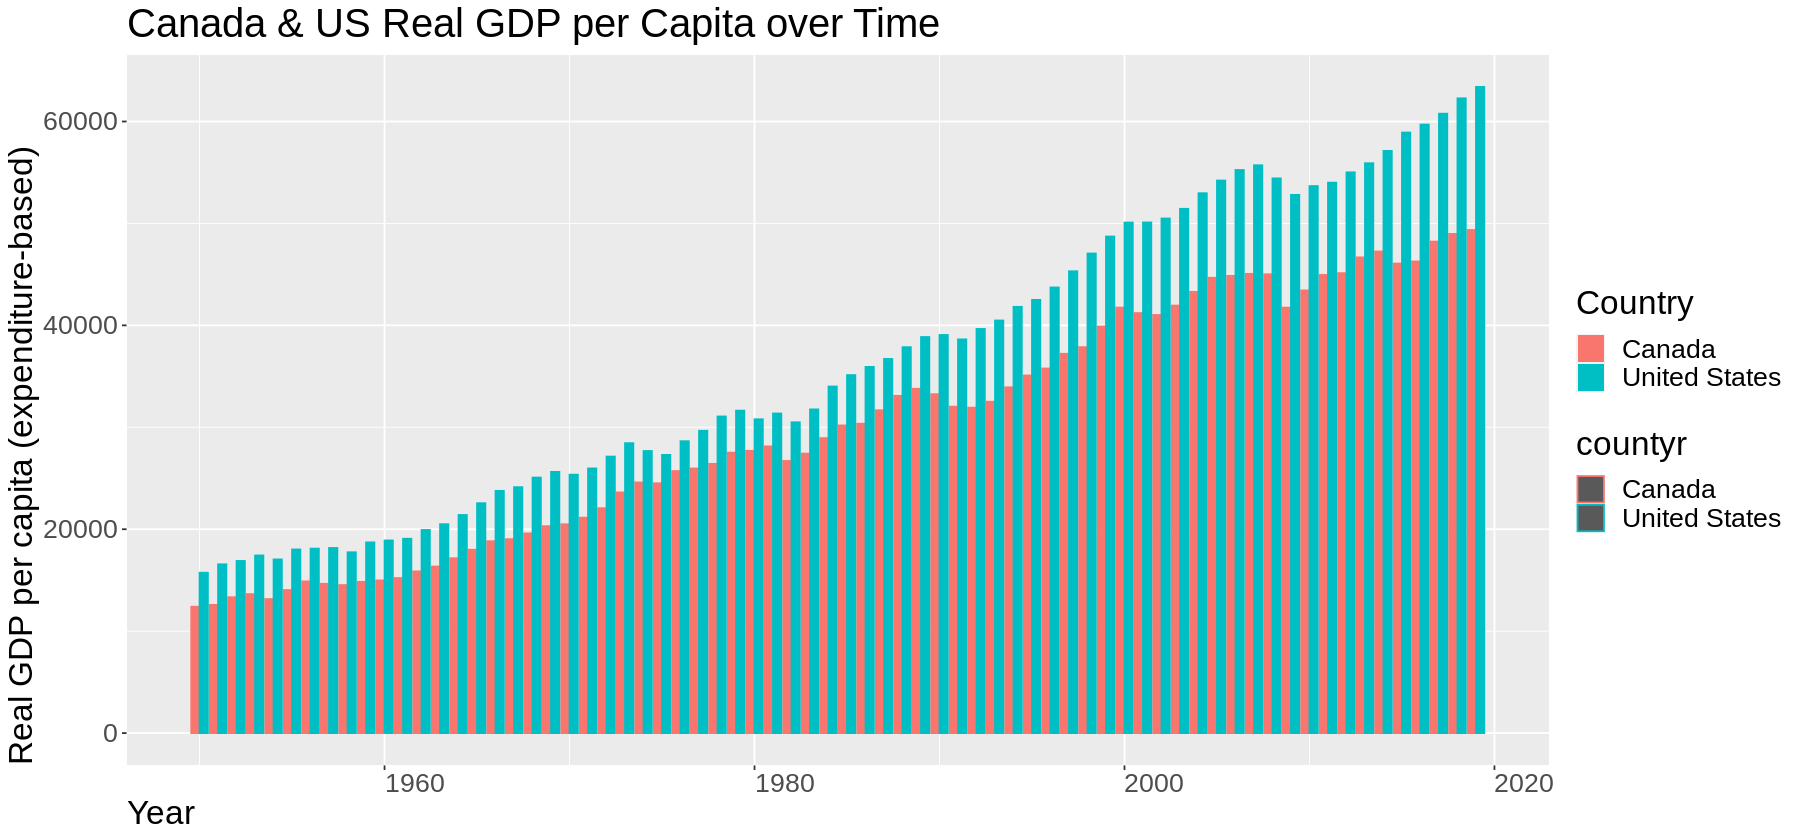

In [6]:
basic_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, # specifies the fill to be by country
                    color = country)) + # specifies the outline to also be by country
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "countyr",
             title = "Canada & US Real GDP per Capita over Time") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 20, hjust = 0)) # specifies the x, y and legend label text size
        options(repr.plot.width = 15, repr.plot.height = 7) # specifies the dimension 
  
basic_plot

### Exercise 1 
Fix the typo from the graph above (in the code below!) so that the two legends on the righthand side are merged into one.

> **Hint**: remember that arguments in the `ggplot()` contain aesthetic mappings, while arguments in the `labs()` function contain labels and other specifications that are set by us and not the data. What might be going on here that would create two legends on this graph?

In [ ]:
# replace the error with your answer: your legend should begin with a Capital letter

basic_plot_test <- ggplot(data = NA_data,  
                    aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, # specifies the fill to be by country
                    color = country)) + # specifies the outline to also be by country
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "countyr",
             title = "Canada & US Real GDP per Capita over Time") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 20)) # specifies the x, y and legend label text size
        options(repr.plot.width = 15, repr.plot.height = 7) # specifies the dimension 

basic_plot_test

In [ ]:
answer_1 <- basic_plot_test

test_1()

#### The `theme()` function
We also learned about the `theme()` function, which allows us to modify components of a theme such as text. \
As a refresher, one `theme()` argument we've already covered is:

`text = element_text()`  specifies text attributes that broadly apply to all text components in a graph
* Example: title, labels, caption, etc.

>**NEW ARGUMENTS** \
>`plot.title = element_text()` allows specifications for the title text. \
>`plot.subtitle.title = element_text()` allows specifications for the subtitle text. \
>`plot.caption = element_text()` allows specifications for the caption text. \
>`axis.text.x = element_text()` allows specifications for x axis text \
>`axis.text.y = element_text()` allows specifications for y axis text. \
>`legend.position =` allows specifications for legend position.
 >* example, `"top"`, `"bottom"` or as a vector: `c(x-coordinate, y-coordinate)`

When considering text size, we always want to ensure that our text is readable to an audience with a range of seeing abilities - we might ask ourselves: _could a grandparent or older person I know read this at first glance?_ 

As we'll explore below, adjusting label size and boldness, for example, can help us emphasize important information about a graph that we'd like our audience to focus on. In effect, this means leveraging the power of the size and thickness of text to encode visual cues that signal a hierarchy of importance. You can check out an extensive list of `theme()` arguments in [this documentation resource created by R Studio](https://ggplot2.tidyverse.org/reference/theme.html).

#### The `element_text()` function
There are also a quite a few things we can specify using the `element_text()` function:

`size =` specifies x-axis title (default in R is set at size 11)

>**NEW ARGUMENTS** \
>`hjust =` specifies the position of the plot titles (default is left).
>* `0.5`: centre, `1`: right, `0`: left 
>
>`color =` specifies the text color. \
>`face =` specifies typographical emphasis.
>* example: `"bold"`, `"italic"`, `"bold.italic"` 
>
>`angle =` specifies angular rotation of text. \
>`vjust =` specifies the vertical adjustment. 
>* example: higher number is up, lower number is down from the graph (default is 0)

Let's use some of these new functions and arguments to improve our earlier visualization!

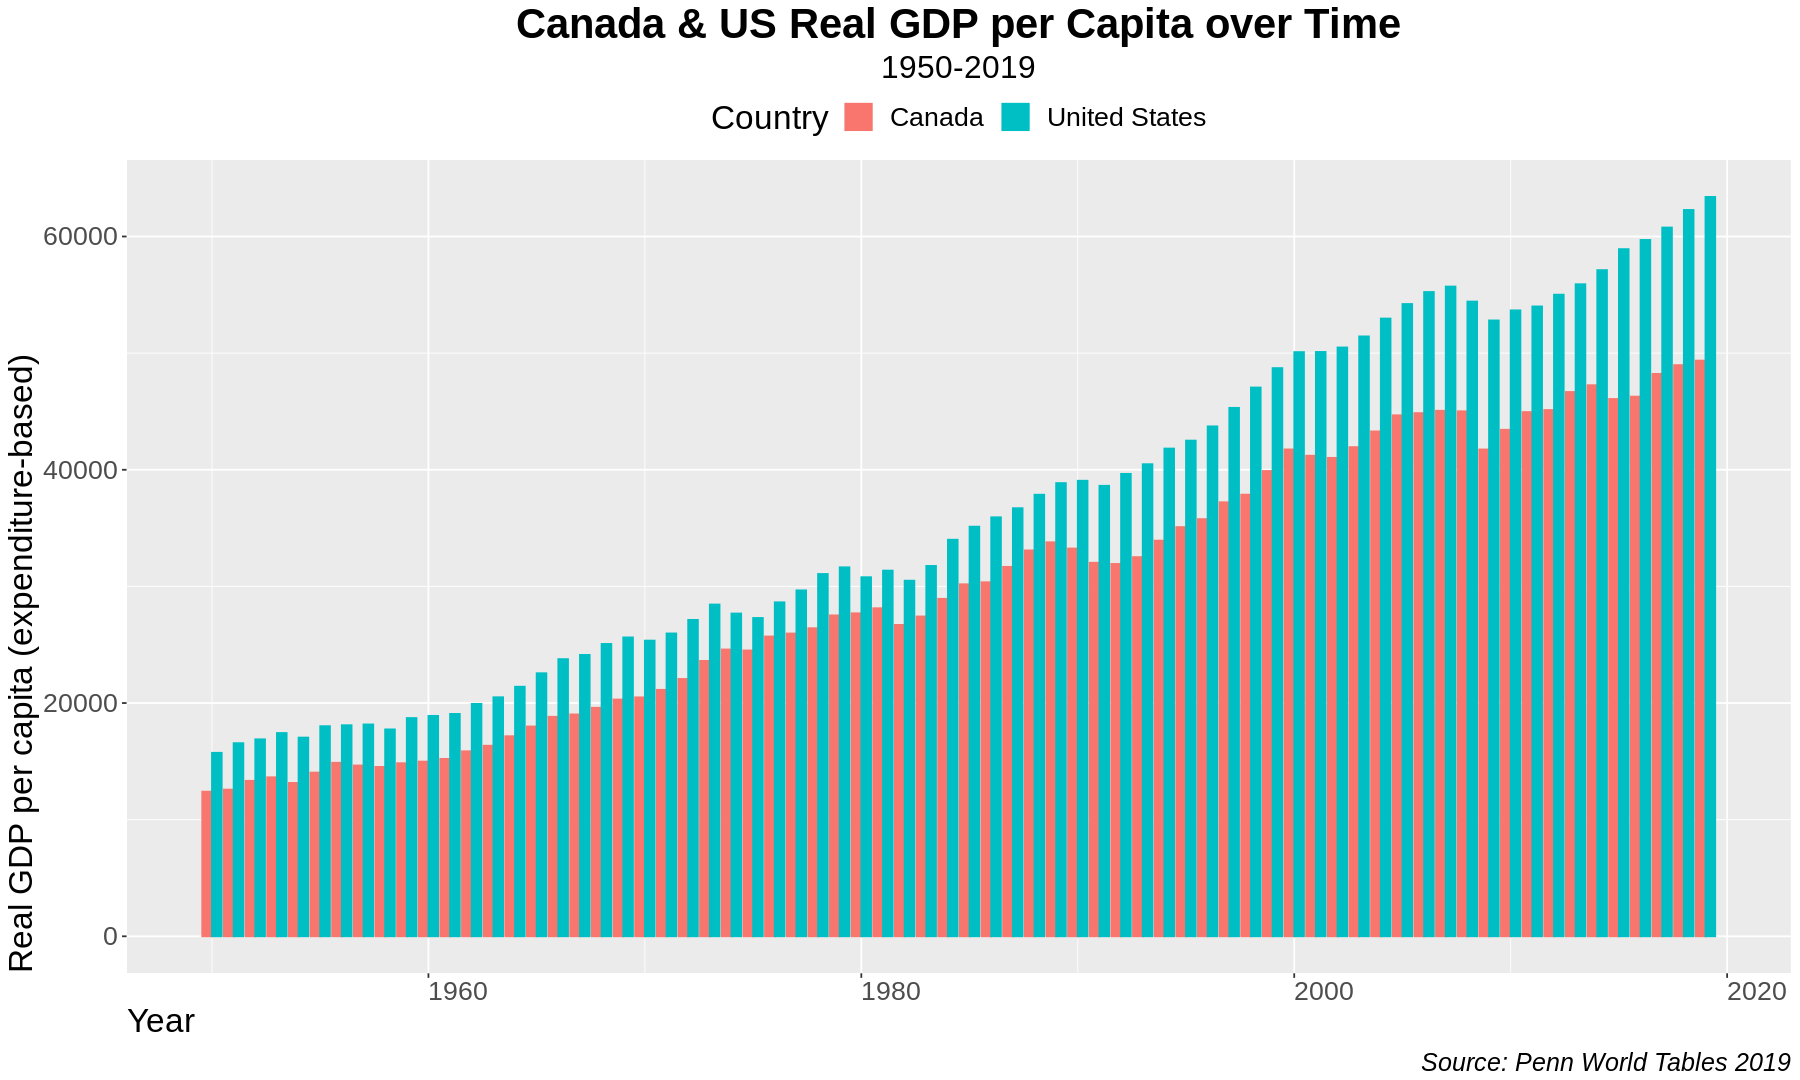

In [7]:
intermediate_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country,
                    geom_text(mapping = country))) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 20, hjust = 0)) + # specifies the x, y and legend label text size
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) + # specifies title text details
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  # specifies subtitle text details
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + # specifies caption text details
        theme(legend.position = "top")  # places the legend at the top of the graph
        options(repr.plot.width = 15, repr.plot.height = 9) 

intermediate_plot

### Formatting Graphs

#### Scales
At times, we may wish to visualize only a subsection of our data. To do this, we can use the following commands which manipulate the scale of our graphs: 
* `xlim()` specifies scale adjustments on the x-axis.
* `ylim()` specifies scale adjustments on the y-axis.

Both of these functions take two arguments - one lower bound limit and one upper bound limit, like this: `xlim(lowerbound,upperbound)` . We can use the `xlim()` and `ylim()` functions to examine subsections of our axis variables. In the GDP per capita over time plot that we've been working with, use `xlim()` to view a subsection of data from 2000-2019 below. This will make the power of changing the scale of our graph much more obvious.

**Note**: scaling can occur on any quantitative attribute, that is, we can scale variables other than year.

Warning message:
“Removed 102 rows containing missing values (geom_col).”


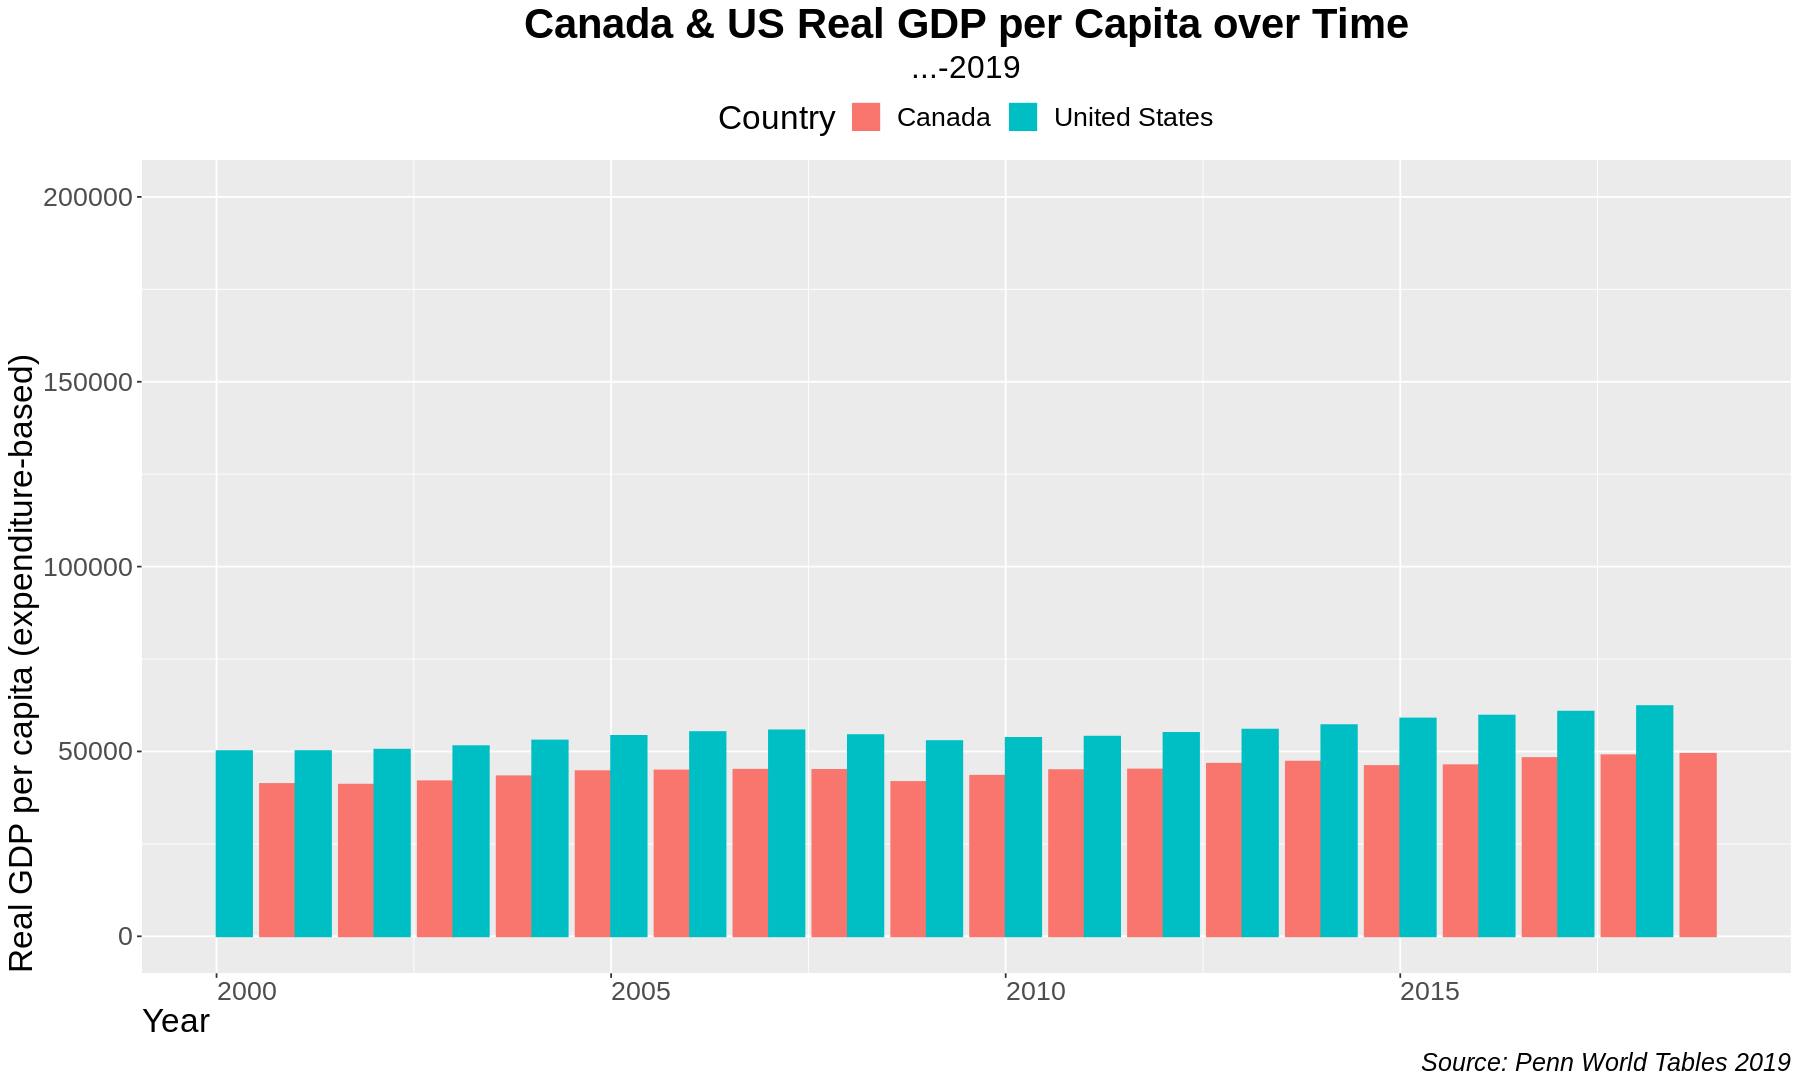

In [10]:
# fill in the ... to make the graph

scaled_plot <- ggplot(data = NA_data,  
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita over Time", subtitle = "...-2019",  # adjust the subtitle to reflect the window of time we're working with
             caption = "Source: Penn World Tables 2019") +
        geom_col(position = "dodge") +
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) +
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        xlim(2000,2019) + # adjust x-axis scale with lower bound = 2000 and upper bound = 2019
        ylim(0,200000) # adjust the max y value to 200,000 rather than the automatic scale of ~64,000
        options(repr.plot.width = 15, repr.plot.height = 9) 

scaled_plot

_What do you notice about this graph? How do the oscillations (ups and downs) appear different when zoomed in here versus in the large view in the other visualization?_ 

<span style="color:#CC7A00" > 🔎 **Let's think critically** </span>
> 🟠 What are some good reasons why we might want to adjust the scale limits of our axis? \
> 🟠 Is there a subsection of data that would be of interest? Why? \
> 🟠 Are we trying to make our oscillations seem less volatile (as seen above) to prove a point? What point? \
> 🟠 Are our scale choices helping our audience gain an understanding of the data that is as objective and accurate as possible? 

The points above are all important to consider in any data visualization project. This is because scaling in particular can communicate a variety of different messages depending on how it is used. This example provides just one demonstration of this idea.

#### Faceting
So far, we've only been creating one plot at a time; we may, however, be interested in piecing together a visualization that takes on a more dashboard-like effect to display multiple plots in a grid simultaneously. A function we can use to achieve this is `facet_grid()`. To _facet_ something simply means to split - in data visualization, faceting helps us arrange graphs into multiple views or layers which can help us explore multidimensionality and visualize complexity in a dataset. 

>**NEW ARGUMENTS** \
>`facet_grid(rows = vars(variable))` creates a grid of plots using a variable or variables split into rows (horizontal split) or columns (vertical split). The `vars()` function allows our variable(s) of choice to be correctly evaluated in the context of the data frame. \
> `geom_hline()` creates a _horizontal_ line across our plot(s) at a y value of our choosing. \
> `geom_vline()` creates a _vertical_ line across our plot(s) at an x value of our choosing.

Both `geom_hline()` and `geom_vline()` can be used on single plots and subplots to emphasize particular thresholds, values or time periods. In the graph below, we'll add a horizontal line to our faceted plot to help us see when the GDP from each G7 country rose above 40,000.

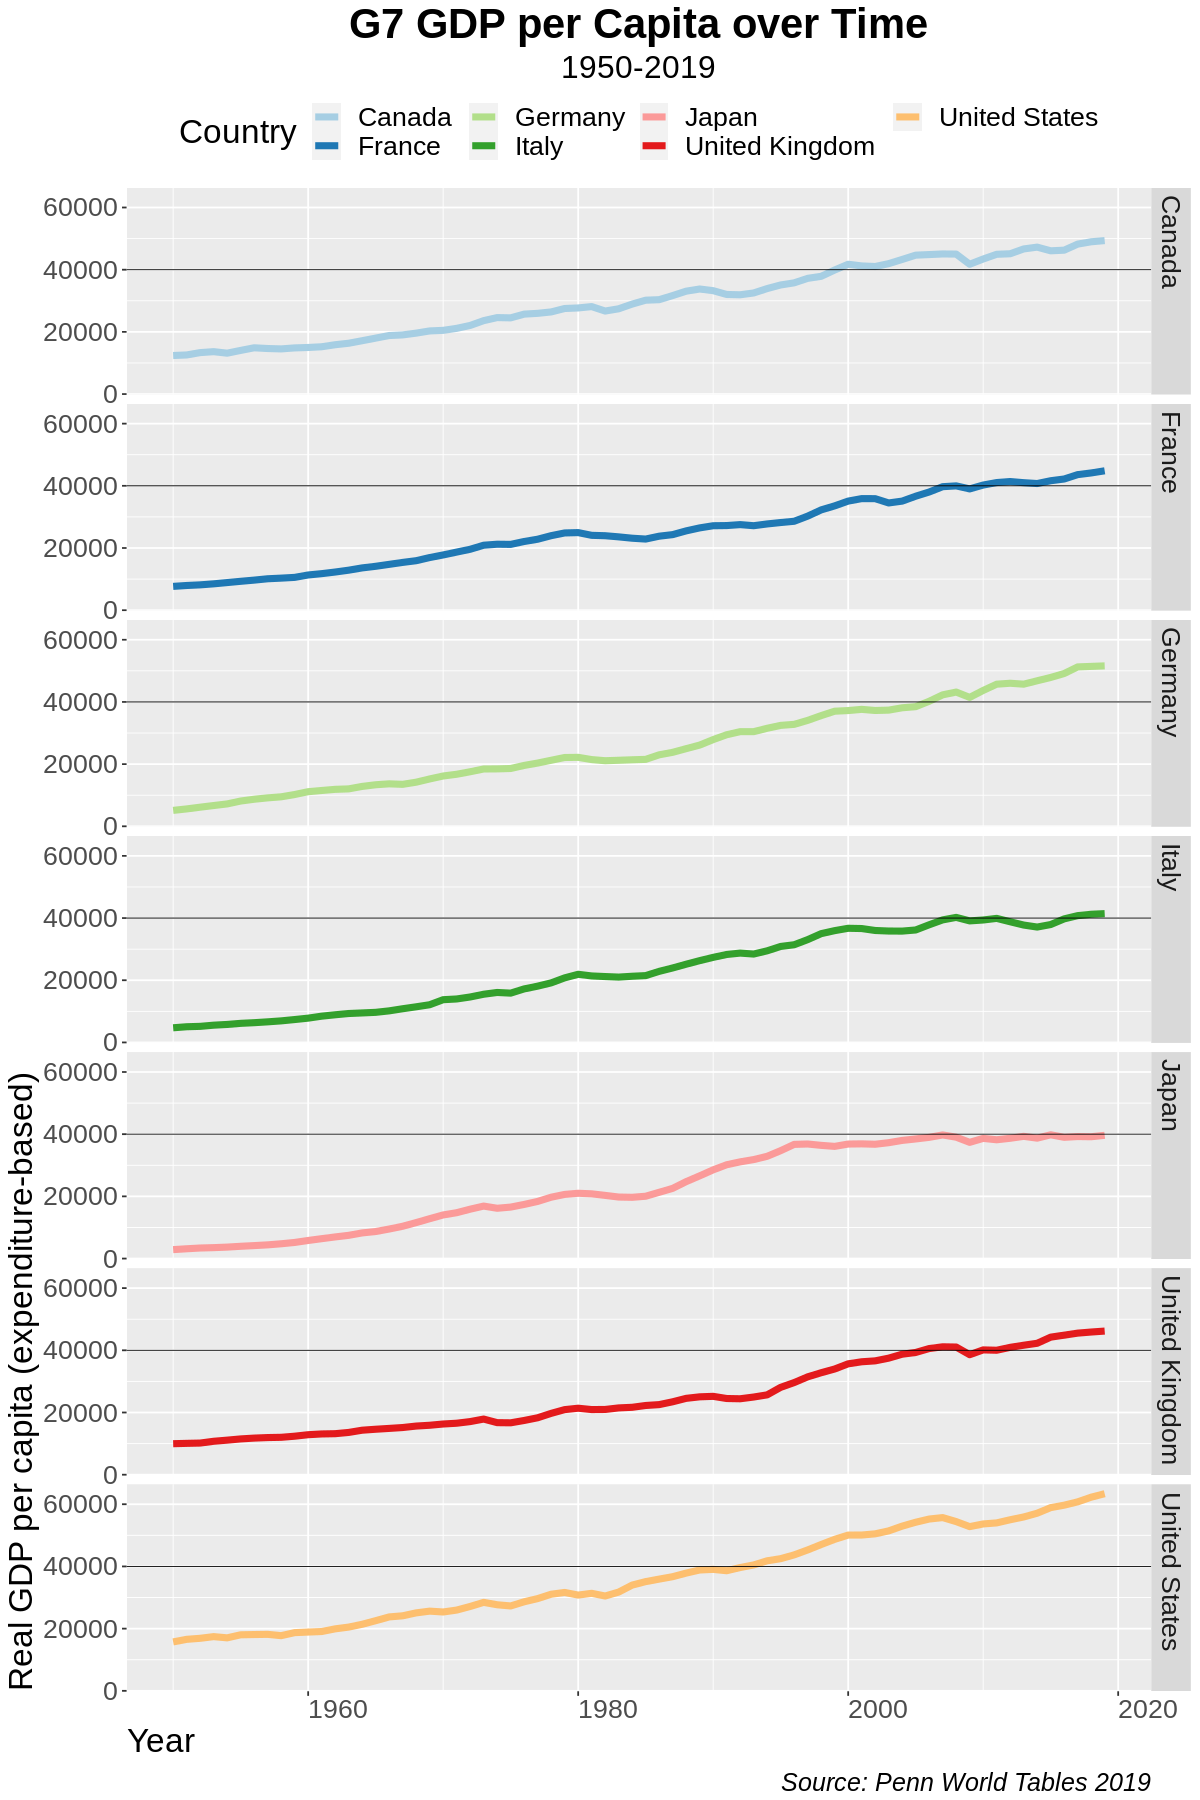

In [11]:
g7_data <- pwt_data %>%
filter(country == "Canada" | country == "United States" | country == "France" | 
       country == "Germany" |  country == "Italy" |  country == "Japan" | country == "United Kingdom")  # select G7 countries  

facet_plot <- ggplot(data = g7_data,      
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = as_factor(country), 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "G7 GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_line(size = 2) +
        theme(text = element_text(size = 18, hjust = 0)) +
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) + 
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        geom_hline(yintercept = 40000, linetype = "solid", size = 0.25) + # add horizontal line 
        facet_grid(rows = vars(country)) + # create a set of subplots organized by country
        scale_color_brewer(palette="Paired")
        options(repr.plot.width = 10, repr.plot.height = 15) 

facet_plot

Faceting allows us to arrange charts to make comparisons while leveraging the power of white space to handle visual complexity. Without faceting, a consolidated line chart of all G7 countries such as the one below might look overcrowded and create challenges in observing the nuances between countries.

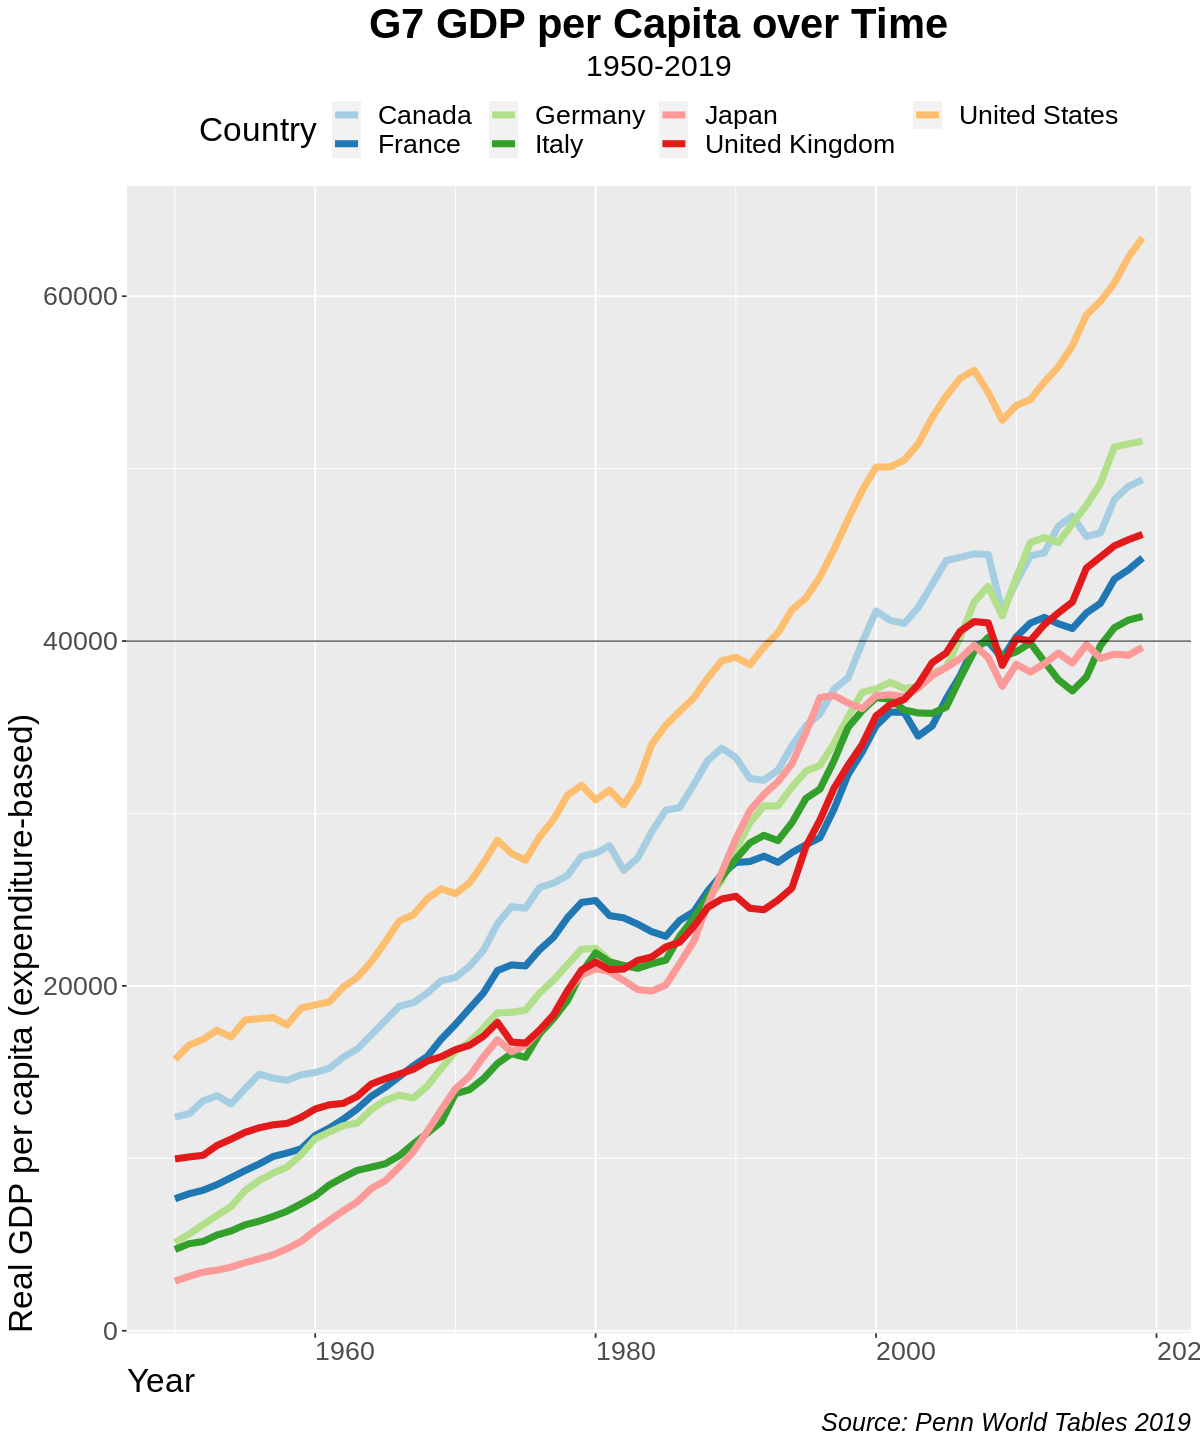

In [12]:
line_plot <- ggplot(data = g7_data,      
                aes(x = year,   
                    y = rgdpe/pop, 
                    fill = as_factor(country), 
                    color = country)) +
        labs(x = "Year",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "G7 GDP per Capita over Time", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_line(size = 2) +
        theme(text = element_text(size = 18, hjust = 0)) +
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) + 
        theme(plot.subtitle = element_text(size = 18, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top") +
        geom_hline(yintercept = 40000, linetype = "solid", size = 0.25) + # add horizontal line +
        scale_color_brewer(palette="Paired")
        options(repr.plot.width = 10, repr.plot.height = 12) 

line_plot

We can see that this graph above, while it is quite consolidated, does not present the specific patterns of each country as clearly as does our faceted graph immediately before it.

#### Confidence Bands
When creating visualizations which use a predictive element like a regression line, we can summon graph features that visualize how accurate our model is at predicting a variable (or variables) with 95% confidence. By using this feature, we can visualize prediction error and invite our viewer to understand and take into account the possible error that our visualization holds.

>**NEW ARGUMENTS** \
>`geom_smooth()` creates a trendline that aids the eye in spotting patterns in the data. \
> Arguments within this function include:
> * `method =` specifies the type of smoothing we want to use - in this notebook, we'll use linear regression using the `lm` function.
> * `se =` uses a logical argument to specify the presence of a standard error/confidence band (default is `TRUE`).
> * `colour =` specifies the colour of the trendline.
> * `fill =` specifies the colour of the confidence band. 

### Design
Before we move into some case studies, we'll examine a few more design tips and tricks that we can add to our visualization toolkit to make our visualizations look extra polished from an aesthetic standpoint! ✨

#### Shapes
When working with scatterplots, we can change the shape of the data points using the `pch =` argument. Changing the shape of data points should be done when the icon of choice can provide a useful visual code that supports the audience's understanding of the graph.
* For example, in the image below, option 2 (the upwards triangle icon) might be useful to visualize growth or movement upwards, whereas option 6 (the downwards triangle icon) might be useful to visualize decline or movement downwards

The shape options are listed in the chart below - the default, as we've seen before, is 19, a simple circle. Note that numbers 21-25 are shapes that have both fill and outline colour options which can be helpful if we are trying to make our data points stand out better. This is particularly useful if we are working with a large data set. 

![Geom point shape options](media/pch_options.png)

Try exploring a few different shape and size options in the scatterplot below!

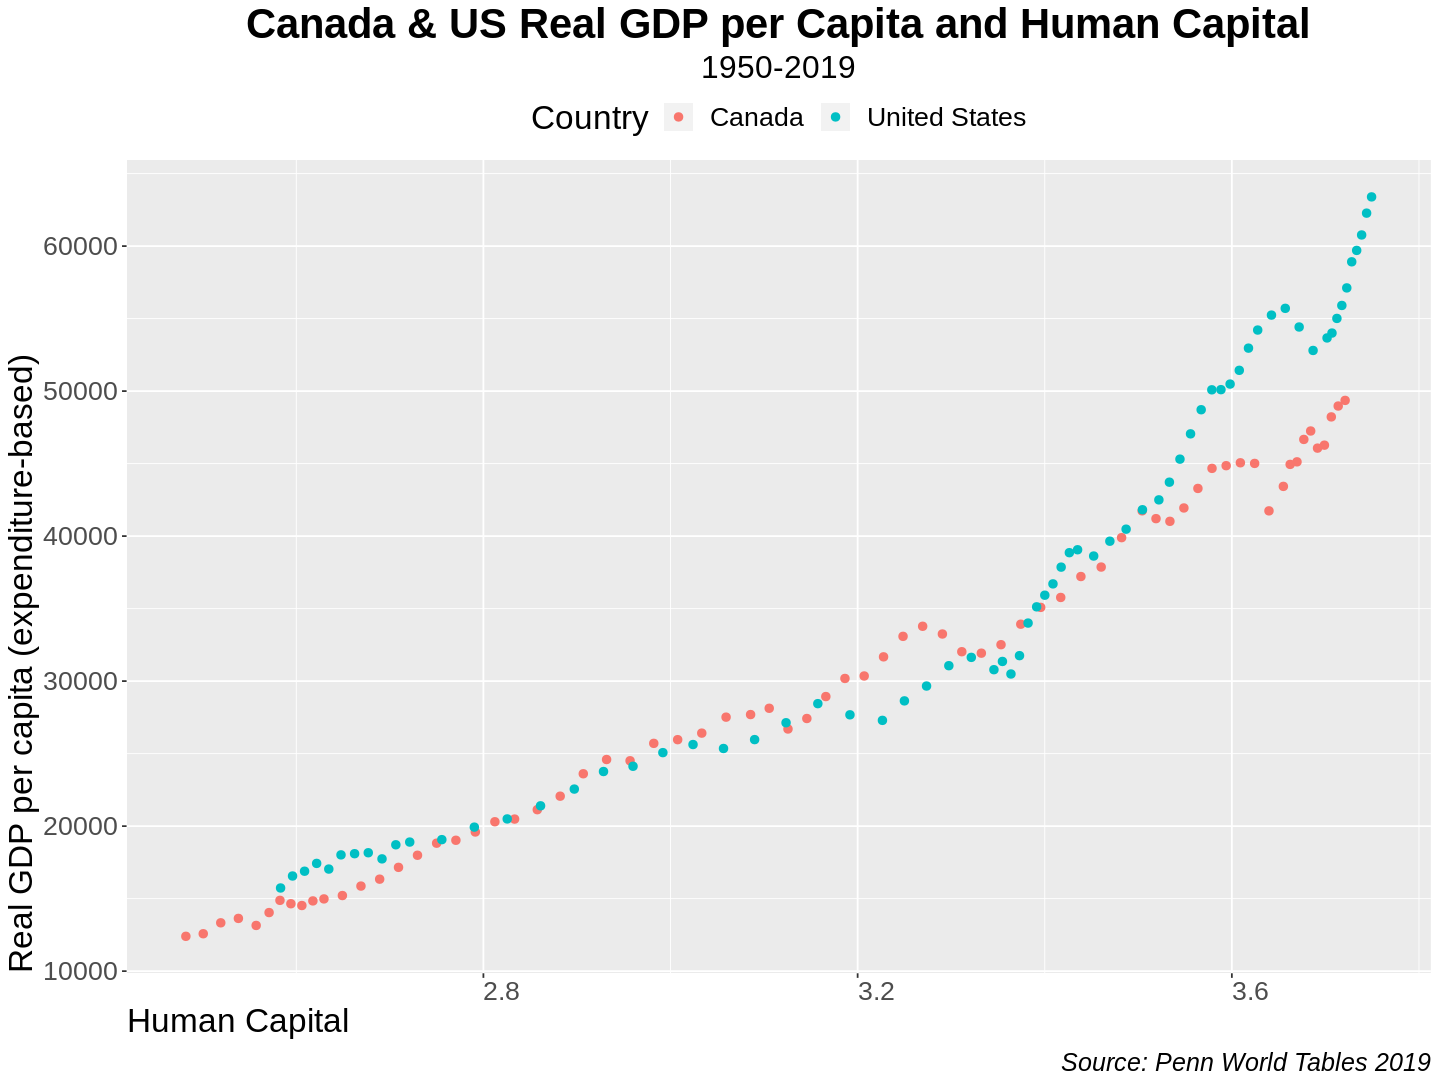

In [13]:
intermediate_scatterplot <- ggplot(data = NA_data,  
                aes(x = hc,   
                    y = rgdpe/pop, 
                    fill = country, 
                    color = country,
                    geom_text(mapping = country))) +
        labs(x = "Human Capital",  
             y = "Real GDP per capita (expenditure-based)",
             fill = "Country",
             color = "Country", 
             title = "Canada & US Real GDP per Capita and Human Capital", subtitle = "1950-2019", 
             caption = "Source: Penn World Tables 2019") +
        geom_point(pch = 19, size = 2) + # try exploring a few different shape and size options 
        theme(text = element_text(size = 20, hjust = 0)) + 
        theme(plot.title = element_text(size = 25, hjust = 0.5, color = "black", face = "bold")) +
        theme(plot.subtitle = element_text(size = 19, hjust = 0.5)) +  
        theme(plot.caption = element_text(size = 15, face = "italic", vjust = 0)) + 
        theme(legend.position = "top")  
        options(repr.plot.width = 12, repr.plot.height = 9) 

intermediate_scatterplot

#### Colour
In our last notebook, we introduced the `RColorBrewer` theme options in which colour themes could be specified using character strings that include text like `"blue"` or `"Set3"`. Colours can also be set using hexadecimal colour codes, which are six digit codes that store information about a color by various levels of red (R), green (G), and blue (B) like this: (#RRGGBB).
> ex. "#FF0000" (red), "#FF6347" (orange), "#FFD700" (yellow) 

When encoding colours into a visualization, choose diverse colours when making comparisons, and where appropriate, use colour hue (i.e. the lightness or darkness of a colour) when demonstrating concentration or other quantitative measures. Be sure to not pick too many colours (no more than a dozen is recommended) that may distract your audience from the main message of the visualization. Also be sure not to choose colours which can signal a helpful semantic (semantics is a domain of philosophy concerned with _meaning_) association; for example, in the West, green might be used to indicate growth, while red might be used to indicate loss or warning. Colour semantics vary from place to place and culture to culture.

You may have noticed that the default background colour for visualization in R is a pale grey colour. This is fine for quick visualizations, but there may be cases where we would like our visualization to have a more intentional aesthetic. Using a white background, for example, can make a visualization look a bit cleaner and allow colours to stand out better.

To change our background colour, we can add layers to our ggplot visualizations using the following functions which invoke pre-designed themes from the `ggthemes()` package we imported at the beginning of our notebook:
>`theme_bw()` white background, grey gridlines, black graph border \
>`theme_minimal()` white background, grey gridlines, no graph border \
>`theme_classic()` white background, no gridlines, no graph border \
>`theme_economist()`: a theme based on the plots in the [The Economist magazine](https://www.economist.com/) \
> `theme_hc()`: a theme based on [Highcharts JS](https://www.highcharts.com/) \
>`theme_wsj()`: a theme based on the plots in the [The Wall Street Journal](https://www.wsj.com/)

You can read more about [ggthemes](https://mran.microsoft.com/snapshot/2016-12-28/web/packages/ggthemes/vignettes/ggthemes.html) here.

When working with colours, it's important use colours that are "understandable by those with colorblindness (a surprisingly large fraction of the overall population — from about 1% to 10%, depending on sex and ancestry (Deeb 2005)) ([Timbers, T., Campbell, T., Lee, M. 2022](https://datasciencebook.ca/viz.html)).

We can view a list of colorblind friendly palettes using the following command:

In [ ]:
display.brewer.all(colorblindFriendly = TRUE)

Alternatively, once we have completed and exported a visualization, we can run it through a [Colour Blindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) like this one to test if our visualization looks okay from the perspective of those who have different colour blindness or impairment conditions.

## Part 2: Case Studies

Let's now apply what we've learned with a few case studies. In them, we will try to recreate a few different types of graphs with our PWT dataset!

### Case Study 1: Labeled Scatterplots
Let's see if we can use our tools to recreate a graph similar to the one below using our PWT data set. 

What type of plot will we want to specify using the `geom_X` command?

In [ ]:
# Fill in the ... with your answer below (example: "geom_histogram")

answer_2 <- "geom_..."
test_2()

![2014 Wellbeing and Financial Inclusion Map](media/Wellbing_and_financial_inclusion_scatterplot.png)

> **Source**: Boston Consulting Group

In [14]:
# filter our data for a subset of African and South American Countires
casestudy2_data <- filter(pwt_data, year == 2014, country == "Ethiopia" | country == "South Africa" | country == "Kenya" | country == "Rwanda" | country == "Botswana" | country == "Nigeria" | country == "Mali" | country == "Peru" | country == "Brazil" | country == "Chile" | country == "Paraguay" | country == "Colombia" | country == "Argentina") %>%

# assign each observation to a corresponding "region", since we are only given data at the country-level
mutate(region = c("South America","South America","Africa","South America","South America","Africa","Africa","Africa","Africa","South America","South America","Africa","Africa")) %>%
    select(country, region, hc, rgdpe, pop)

Trace through the code below to see where we apply what we learned from Part 1!

In [ ]:
labeled_scatter <- ggplot(casestudy2_data, aes(x = hc, y = rgdpe/pop, fill = region, label = country)) +
    geom_point(color = "grey", size = 10, shape = 21, stroke = 1) + # shape 21 allows a stroke to be made visible, the default = 19
    theme_hc() + # use a clean, white background
    geom_text(size = 7, nudge_y = 10, nudge_x = 0.09) + # adjusting our text
    labs(x = "Human Capital Index", y = "GDP per Capita", fill = "", title = "Human Capital and GDP per Capita in Africa and South America",
        subtitle = "2014") +
    theme(text = element_text(size = 18), legend.position = "top") + # place our legend at the top to maximize space
    geom_smooth(method = lm, se = FALSE, colour = "black", size = 0.5) + # compute trendlines for the data
    scale_fill_brewer(palette = "Set2")  # select our colour palette
    
labeled_scatter 

### Case Study 2: Confidence Bands
Now, let's see if we can make our own visualization that uses a confidence band!

![2010 Line Graph with Probabilistic Population Projects for China](media/un_population_graphs.png)

[Source: Eviews User Forum](https://forums.eviews.com/viewtopic.php?t=17766)

In [15]:
confidence_data <- pwt_data %>%
    filter(country == "Canada") %>%
    mutate(adjusted_gdp = rgdpe/pop)

Trace through the code below to see where we apply what we learned from Part 1!

`geom_smooth()` using formula 'y ~ x'



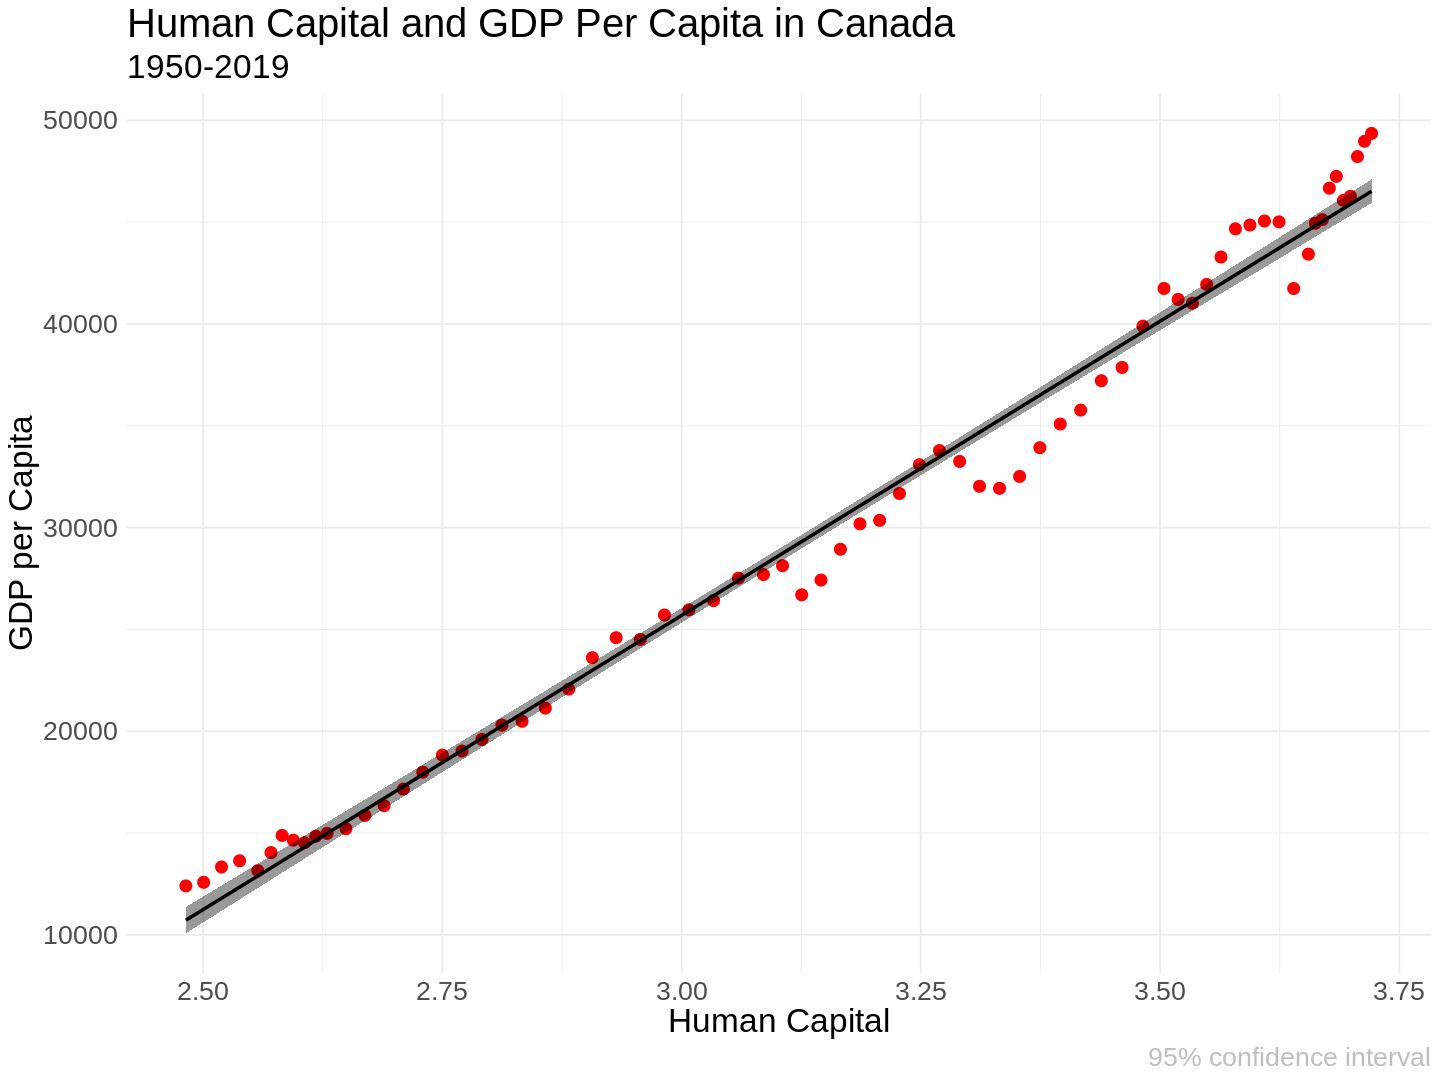

In [16]:
confidence_plot <- ggplot(confidence_data, aes(x = hc, y = adjusted_gdp)) +
    geom_point(colour = "red", size = 3) + # set our data points to be a distinct colour from our confidence interval
    labs(x = "Human Capital", y = "GDP per Capita", fill = "", title = "Human Capital and GDP Per Capita in Canada",
        subtitle = "1950-2019", caption = "95% confidence interval") +
    geom_smooth(method = lm, se = TRUE, colour = "black", size = 0.99, fill = "black") + # compute trendlines for the data
    theme_minimal() + # select a theme with a light grid background
    theme(text = element_text(size = 20), plot.caption = element_text(color = "grey")) # create a plot caption describing the confidence band d
     
confidence_plot

### Exercise 2
Use the `pwt_data` dataframe to create a graph which looks similar to the one below. Store your object in answer_3. (**Hint**: all relevant styling options are identical to those used in the Real GDP per capita comparison across G7 countries we worked through earlier, except `options()`, which specifies a plot width and height of 10 each).

![Answer3](media/answer3.PNG)

In [ ]:
# your code here

answer_3 <-

test_3()

We've covered a lot of content in this notebook. For further reading or exploration, we recommend visiting the hyperlinks attached throughout this module, as all of them are valuable resources for deepening your understanding of visualization in R!